In [52]:
import pandas
import numpy
import tensorflow
import matplotlib.pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout

#load the csv file and rename the columns
dataset = pandas.read_csv( 'LoanDefaultData.csv' )

dataset.rename( { 'BAD': 'defaultResult', 'LOAN': 'loanRequested', 'MORTDUE': 'currentMortageDue',\
                  'VALUE': 'currentPropertyValue', 'REASON': 'reasonForRequest', 'JOB': 'Job',\
                  'YOJ': 'yearsAtJob', 'DEROG': 'derogatoryReports', 'DELINQ': 'delinquentLines',\
                  'CLAGE': 'ageOldestTradeLine', 'NINQ': 'recentCreditLines', 'CLNO': 'totalCreditLines',\
                  'DEBTINC': 'debtToIncome' }, inplace = True, axis = 'columns' )

#shuffle the dataframe
loanDefaultDataset.reindex( numpy.random.permutation( loanDefaultDataset.index ) );

In [53]:

#replace nan values with averages and modes
dataset.currentMortageDue.fillna( dataset.currentMortageDue.mean(), inplace = True )

dataset.currentPropertyValue.fillna( dataset.currentPropertyValue.mean(), inplace = True )

dataset.reasonForRequest.fillna( dataset.reasonForRequest.mode().iloc[ 0 ] , inplace = True )

dataset.Job.fillna( dataset.Job.mode().iloc[ 0 ], inplace = True )

dataset.yearsAtJob.fillna( dataset.yearsAtJob.mean(), inplace = True )

dataset.derogatoryReports.fillna( dataset.derogatoryReports.mode().iloc[ 0 ], inplace = True )

dataset.delinquentLines.fillna( loanDefaultDataset.delinquentLines.mode().iloc[ 0 ], inplace = True )

dataset.ageOldestTradeLine.fillna( dataset.ageOldestTradeLine.mean(), inplace = True )

dataset.recentCreditLines.fillna( dataset.recentCreditLines.mode().iloc[ 0 ], inplace = True )

dataset.totalCreditLines.fillna( dataset.totalCreditLines.mode().iloc[ 0 ], inplace = True )

dataset.debtToIncome.fillna( dataset.debtToIncome.mean(), inplace = True )

#one hot encode the dataframe
dataset = pandas.get_dummies( dataset )

In [54]:
#normalize the data
datasetColumns = dataset.columns

SklearnMinMaxScaler = MinMaxScaler( copy = False )

SklearnMinMaxScaler.fit( dataset )

dataset = SklearnMinMaxScaler.transform( dataset )

dataset = pandas.DataFrame( dataset, columns = datasetColumns );



In [56]:
#split the data into train, validation and test sets
dataSetTargets = dataset[ 'defaultResult' ]

dataSetFeatures = dataset.drop( [ 'defaultResult' ], axis = 'columns' )

dataSetTargetsTrain = dataSetTargets[ :3500 ]

dataSetTargetsValidation = dataSetTargets[ 3500:4600 ]

dataSetTargetsTest =  dataSetTargets[ 4600: ]

dataSetFeaturesTrain = dataSetFeatures[ :3500 ]

dataSetFeaturesValidation = dataSetFeatures[ 3500:4600 ]

dataSetFeaturesTest =  dataSetFeatures[ 4600: ]


In [40]:
#find best parameters for binary classifier
binaryClassifier = Sequential()

binaryClassifier.add( Dense( 64, activation = 'relu', input_shape = ( 18, ) ) )
binaryClassifier.add( Dropout( 0.55 ) )
binaryClassifier.add( Dense( 64, activation = 'relu' ) )
binaryClassifier.add( Dropout( 0.55 ) )
binaryClassifier.add( Dense( 1, activation = 'sigmoid' ) )


binaryClassifier.compile(optimizer = 'rmsprop', 
                         loss = 'binary_crossentropy', 
                         metrics = [ 'binary_accuracy' ])


binaryClassifierHistory = binaryClassifier.fit(loanDefaultDataSetFeaturesTrain, 
                         loanDefaultDataSetTargetsTrain, 
                         batch_size = 128, 
                         epochs = 100,
                         validation_data = ( loanDefaultDataSetFeaturesValidation, loanDefaultDataSetTargetsValidation ),
                         verbose = False);


binaryClassifierHistory = binaryClassifierHistory.history

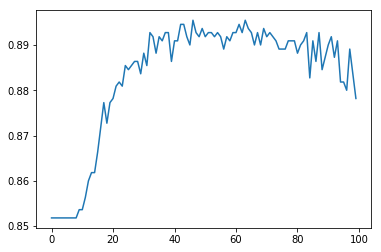

In [41]:
#plot validation accuracy
validationBinaryAccuracy = binaryClassifierHistory[ 'val_binary_accuracy' ] 


matplotlib.pyplot.plot( range( 100 ), validationBinaryAccuracy );




In [57]:

#train classifier with best parameters found on all train data
featuresTrainFinal = pandas.concat([dataSetFeaturesTrain,
                                    dataSetFeaturesValidation],
                                    axis = 0)

targetsTrainFinal = pandas.concat([ dataSetTargetsTrain, 
                                    dataSetTargetsValidation],
                                    axis = 0)


historyFinal = binaryClassifier.fit(featuresTrainFinal, 
                                    targetsTrainFinal, 
                                    batch_size = 128, 
                                    epochs = 50,
                                    validation_data = ( dataSetFeaturesTest, dataSetTargetsTest ),
                                    verbose = False);


historyFinal = historyFinal.history

      
    

In [70]:
#output final accuracy
print( 'final binary accuracy:', historyFinal[ 'val_binary_accuracy' ][49] )

predictions = binaryClassifier.predict( dataSetFeaturesTest )

print()
print()
print()

defaults = [ element[0] for element in predictions if element >= 0.5 ]

nonDefaults = [ element[0] for element in predictions if element < 0.5 ]

print('default predictions')

for default in defaults:
    print(default)

print()
print()
print()
print('non default predictions')

for nonDefault in nonDefaults:
    print(nonDefault)




final binary accuracy: 0.851470587534063



default predictions
0.7003154
0.9947555
0.9951361
0.99442106
0.99481416
0.9999999
0.94115937
0.5956807
0.99583554
0.99989295
0.972009
0.9789354
0.92118204
0.99734807
0.9968706
0.59547454
0.93331736
0.99982387
0.9974705
1.0
0.99997735
0.9508376
0.63544106
0.8016229
1.0
0.99972624
0.9999887
0.5490044
0.911687
0.76612365
0.66461706
0.99999976
0.5103012
0.52994585
0.8971687
0.6274261
1.0
0.99992514
0.92425287
0.99225545
0.53065217
0.65190023
1.0
0.6592988
0.87045133
0.87512463
0.6429372
1.0
0.7323655
0.76753306
0.99986744
0.8396743
0.9999995
0.989375
0.8689362
0.99819106
0.99999976
0.99999285
0.97534084
0.9999999
1.0
0.9997023
0.58935183
0.9687514
0.99823844
0.8822301
0.99999905
0.99937326
0.9997408
0.9966912
0.9999782
0.8097348
0.84945554
0.98626107
0.99998
0.790041
1.0
0.9379472
0.7307845
0.99999964
0.99999595
0.9943275
0.7457748
0.5273287
1.0
0.78842014
0.6575524
0.72540873
0.73494005
1.0
0.9977836
0.56608176
0.9998504
0.9999969
1.0
1.0
0.9999